In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
rec = []
for p in os.listdir("./data/babyfolder"):
    if p.endswith(".txt"):
        yb = p.replace("yob", "").replace(".txt", "")
        with open("./data/babyfolder/"+p, "r") as fp:
            x = np.loadtxt(fp, delimiter=",", dtype="str")
            x = pd.DataFrame(
                x, 
                columns=["name", "gender", "frequency"],
                ).assign(
                    name = lambda df: df.name.astype("category"),
                    gender = lambda df: df.gender.astype("category"),
                    frequency = lambda df: df.frequency.astype(int),
                    year = int(yb) 
                )
            rec.append(x)
df = pd.concat(rec)

<AxesSubplot:xlabel='year', ylabel='frequency'>

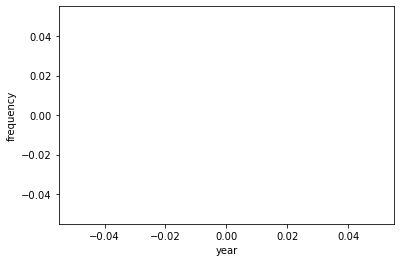

In [75]:
df.query("name == 'A'").plot(x="year", y="frequency", kind="scatter")

In [90]:
(df
 .groupby(["gender", "name"])
 .frequency.sum()
 .reset_index()
 .query("frequency > 0")
 .sort_values("frequency", ascending=False)
).head(50)

#sort_values(by="frequency", ascending=True).head(50)

,gender,name,frequency
141654,M,James,5202714
146099,M,John,5150510
179506,M,Robert,4834094
167032,M,Michael,4392696
198188,M,William,4156142
63516,F,Mary,4132497
123702,M,David,3646903
146828,M,Joseph,2639396
178982,M,Richard,2571082
118375,M,Charles,2411608


In [57]:
df.query("name == 'Zzyzx'")

,name,gender,frequency,year
34088,Zzyzx,M,5,2010
32195,Zzyzx,M,5,2018


<AxesSubplot:xlabel='year'>

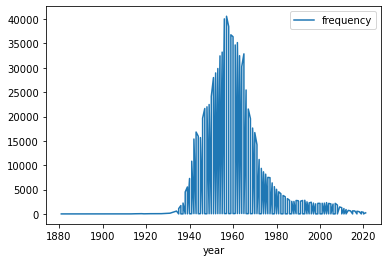

In [91]:
df.sort_values("year").query("name == 'Karen'").plot(kind="line", x="year", y="frequency")

<AxesSubplot:title={'center':'Mary'}, xlabel='year'>

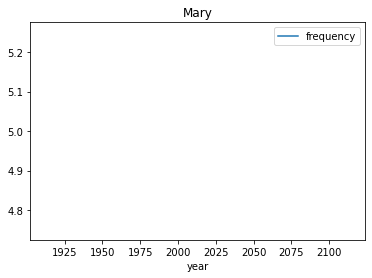

In [89]:
df.query("name == 'Eireen'").plot(x="year", y="frequency", title="Mary")